# Institute for Behavioral Genetics International Statistical Genetics 2025 Workshop 

### Qualtrics link: https://qimr.az1.qualtrics.com/jfe/form/SV_8pEKV30Dw74HVt4

# Practical Contents

- [Introduction](#Introduction)
- [Using Jupyter](#Using-Jupyter)
  - [Learning Objectives 1](#Learning-Objectives-1)
  - [Running cells](#Running-cells)
  - [Modes](#Modes)
  - [Cell types](#Cell-types)
  - [Shell commands](#Shell-commands)
  - [Tips and tricks](#Tips-and-tricks)
  - [<strong style="color: red;">Resetting Jupyter if you get stuck</strong>](#Resetting-Jupyter-if-you-get-stuck)
- [Import and initialize Hail](#Import-and-initialize-Hail)
- [Explore genetic data with Hail](#Explore-genetic-data-with-Hail)
  - [Learning Objectives 2](#Learning-Objectives-2)
  - [Import data from VCF](#Import-data-from-VCF)
  - [What is a `MatrixTable`?](#What-is-a-MatrixTable?)
  - [**Exercise 1**](#Exercise-1)
  - [`show`](#show)
  - [**Exercise 2**](#Exercise-2)
  - [`summarize`](#summarize)
  - [**Exercise 3**](#Exercise-3)
  - [`count`](#count)
- [Integrate sample information](#Integrate-sample-information)
  - [Hail's `annotate` methods](#Hail's-annotate-methods)
  - [Add sample data to our HGDP `MatrixTable`](#Add-sample-data-to-our-HGDP-MatrixTable)
  - [Cheat sheets](#Cheat-sheets)
- [Quality Control](#Quality-Control)
  - [Sample QC](#Sample-QC)
  - [Variant QC](#Variant-QC)
- [Rare Variant Analysis of Sequencing Data with Hail](#Rare-Variant-Analysis-of-Sequencing-Data-with-Hail)
  - [Learning Objectives 3](#Learning-Objectives-3)
  - [The Burden Test](#The-Burden-Test)
    - [Theory](#Theory)
    - [Step 1: Variant Quality Control](#Step-1:-Variant-Quality-Control)
    - [Step 2: Group by gene](#Step-2:-Group-by-gene)
    - [Step 3: Aggregate by gene](#Step-3:-Aggregate-by-gene)
    - [**Exercise 4**](#Exercise-4)
    - [Step 4: Run linear regression per gene](#Step-4:-Run-linear-regression-per-gene)
  - [The Weighted Burden Test](#The-Weighted-Burden-Test)
    - [Theory](#Theory-1)
    - [**Exercise 5**](#Exercise-5)
  - [The Sequence Kernel Association Test (SKAT)](#The-Sequence-Kernel-Association-Test-SKAT)
    - [Theory](#Theory-1)
    - [SKAT in Hail](#SKAT-in-Hail)
  - [Logistic Phenotypes](#Logistic-Phenotypes)

# Introduction


### It doesn't all need to "stick" today

This practical contains a lot of new material, and the goal of this workbook is not for you to be able to reproduce from memory all the various capabilities demonstrated here. Instead, **the goal is for you to get a sense for the kind of analyses can be done with Hail**. 

There is no one-size-fits-all sequencing analysis pipeline, because each sequencing dataset will have unique properties that need to be understood and accounted for in QC and analysis. Hail can empower you to interrogate sequencing data, but it cannot give you all the questions to ask!

Some of the questions and exercises in this notebook might seem unrelated to the specific task of analyzing sequencing data, but that is intentional -- Hail is a computational tool that hopes to help you indulge your scientific curiosity, and asking and answering a variety of questions about many aspects of your data is the best way to learn *how to Hail*.

If your interest in using Hail extends beyond this workshop, there are **lots more** resources available -- documentation, cookbooks, tutorials, and most importantly, the Hail community on the [forum](https://discuss.hail.is) and [zulip chatroom](https://hail.zulipchat.com).

### We encourage you to play

Hail is a highly expressive library with lots of functionality -- you'll see just a small fraction of it today. Throughout this notebook and especially in the denoted **exercises**, we encourage you to experiment with the code being run to see what happens! Sometimes it will be an error, but sometimes you will encounter new pieces of functionality. If you're curious about how to use Hail to ask slightly different questions than the code or exercises here, please ask the faculty! We are eager to help.

### Interactive analysis on the cloud

Part of what we think is so exciting about Hail is that Hail development has coincided with other technological shifts in the data science community.

Five years ago, most computational biologists analyzed sequencing data using command-line tools, and took advantage of research compute clusters by explicitly using scheduling frameworks like LSF or Sun Grid Engine. These clusters are powerful resources, but it requires a great deal of extra thought and effort to manage pipelines running on them.

Today, most Hail users run Hail from within interactive Python notebooks (like this one!) backed by thousands of cores on public compute clouds like [Google Cloud](https://cloud.google.com/), [Amazon Web Services](https://aws.amazon.com/), or [Microsoft Azure](https://azure.microsoft.com/). You don't need to share a cluster with hundreds of other scientists, and you only need to pay for the resources that you use.

You won't get hands-on experience with this kind of usage today, but there are lots of resources to help you get started if you're interested in that. Please stay in touch with us after the workshop ends!

[Back to Contents](#Practical-Contents)

# Using Jupyter

The notebook software that you are using right now is called [Jupyter](https://jupyter.org/), which came from a combination of the languages **Ju**lia, **Pyt**hon, and **R**.

## Learning Objectives 1

 - be comfortable running, editing, adding, and deleting code cells.
 - learn techniques for unblocking yourself if Jupyter acts up.

<strong style="color: red;">You may need to accept the privacy policy for some of the widgets to load properly.</strong>

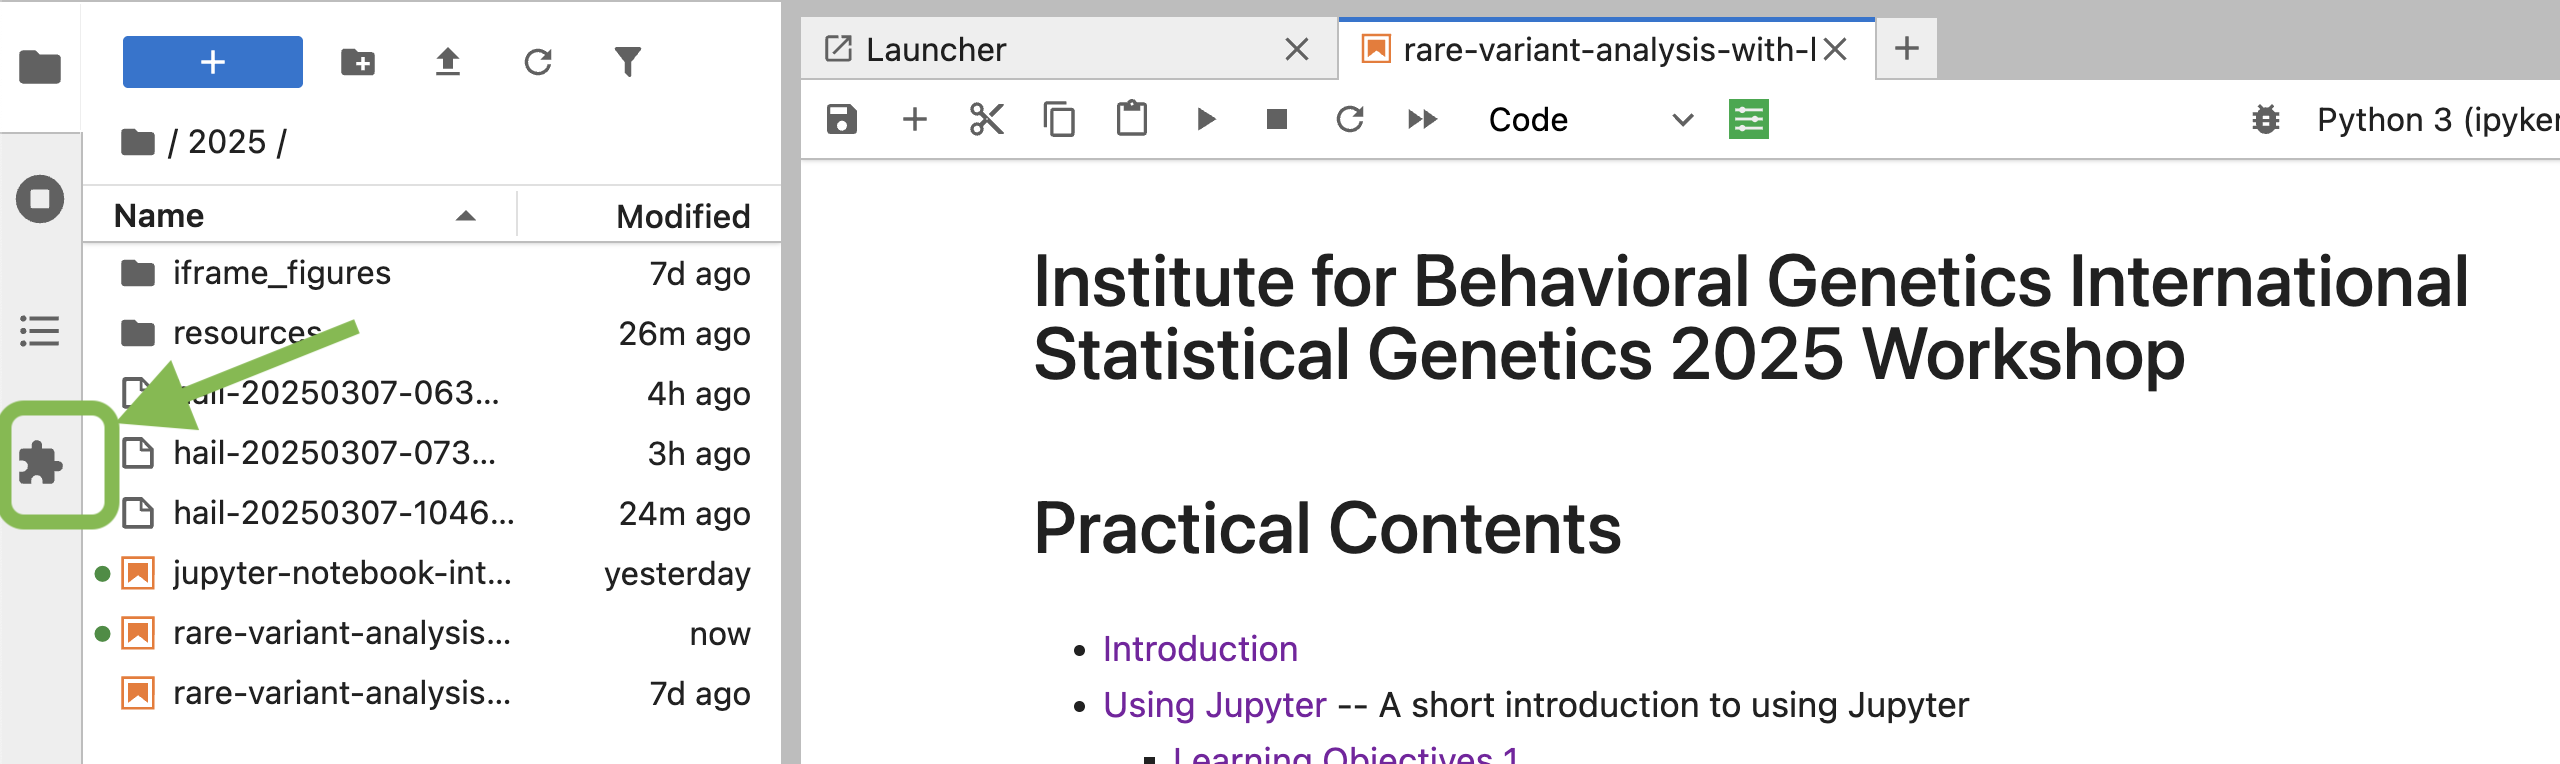
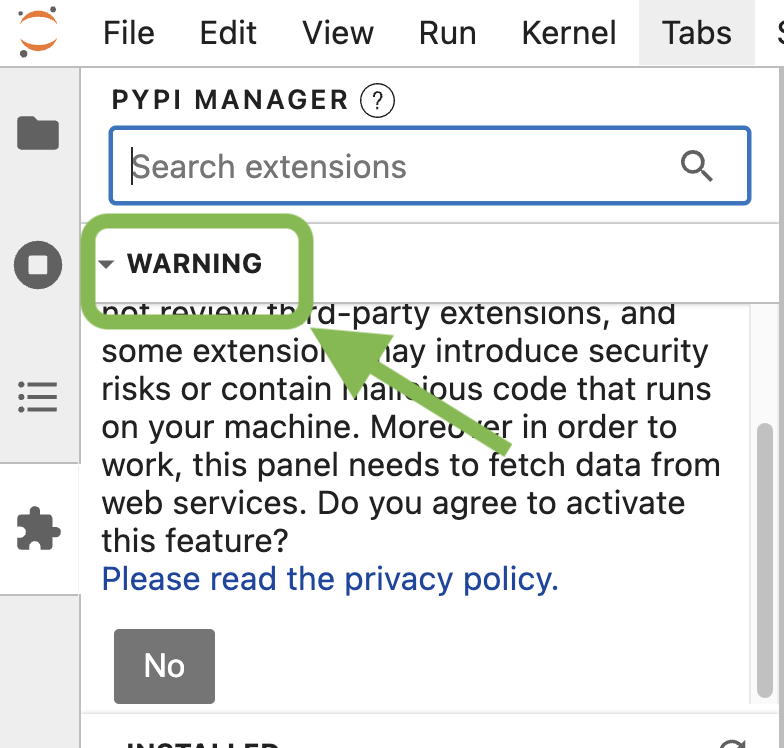

## Running cells

Evaluate cells using **`SHIFT + ENTER`**.  

<span style="font-size:2em">&#9758;</span> Select the next cell and run it.  

If you prefer clicking, you can select the cell and click the "Run" button in the toolbar above.

In [ ]:
print('Hello, world')

## Modes

Jupyter has two modes, a **navigation mode** and an **editor mode**.

### Navigation mode

 - <font color="blue"><strong>BLUE</strong></font> cell borders
 - **`UP`** / **`DOWN`** move between cells
 - **`ENTER`** while a cell is selected will move to **editing mode**.
 - Many letters are keyboard shortcuts! This is a common trap.
 
### Editor mode

 - <font color="green"><strong>GREEN</strong></font> cell borders
 - **`UP`** / **`DOWN`** move within cells before moving between cells.
 - **`ESC`** will return to **navigation mode**.
 - **`SHIFT + ENTER`** will evaluate a cell and return to **navigation mode**.
 
<span style="font-size:2em">&#9758;</span> Try editing this markdown cell by double clicking, then re-rendering it by "running" the cell.

## Cell types

There are several types of cells in Jupyter notebooks. The two you will see in this notebook are **Markdown** (text) and **Code**.

In [ ]:
# This is a code cell
my_variable = 5

**This is a markdown cell**, so even if something looks like code (as below), it won't get executed!

my_variable += 1

## Shell commands

It is possible to call command-line utilities from Jupyter by prefixing a line with a `!`. For instance, we can print the current directory:

In [ ]:
! pwd

## Tips and tricks

Keyboard shortcuts:

 - **`SHIFT + ENTER`** to evaluate a cell
 - **`ESC`** to return to navigation mode
 - **`y`** to turn a markdown cell into code
 - **`m`** to turn a code cell into markdown
 - **`a`** to add a new cell **above** the currently selected cell
 - **`b`** to add a new cell **below** the currently selected cell
 - **`d, d`** (repeated) to delete the currently selected cell
 - **`TAB`** to activate code completion
 
<span style="font-size:2em">&#9758;</span> To try this out, create a new cell below this one using **`b`**, and print `my_variable` by starting with `print(my` and pressing **`TAB`**!

## <strong style="color: red;">Resetting Jupyter if you get stuck</strong>

If at any point during this practical, you are unable to successfully run cells, it is possible that your Python interpreter is in a bad state due to cells being run in an incorrect order. If this happens, you can recover a working session by doing the following:

1. Navigate to the **"Kernel"** menu at the top, and select **"Restart Kernel and Clear Outputs of All Cells..."**.

2. Select the cell you were working on, then navigate to the **"Run"** menu at the top, and select **"Run All Above Selected Cell"**.

3. If the problem persists, reach out to the faculty for help!

[Back to Contents](#Practical-Contents)

# Import and initialize Hail


Now we initialize Hail and set up plotting to display inline in the notebook.

In [ ]:
import hail as hl
from hail.ggplot import *

import plotly
import plotly.io as pio

hl.plot.output_notebook()

pio.renderers.default = "jupyterlab"

This notebook works on a small (~16MB) downsampled chunk of the publically available Human Genome Diversity Project (HGDP) dataset. HGDP is a super-set of the well-known [1000 genomes](https://www.internationalgenome.org/) dataset, with a broader group of represented populations.

We can see the files used using `ls` below:

In [ ]:
! ls -lh resources/

[Back to Contents](#Practical-Contents)

# Explore genetic data with Hail

## Learning Objectives 2

- To be comfortable exploring Hail data structures, especially the `MatrixTable`.
- To understand categories of functionality for performing QC.

## Import data from VCF

The [Variant Call Format (VCF)](https://en.wikipedia.org/wiki/Variant_Call_Format) is a common file format for representing genetic data collected on multiple individuals (samples).

Hail has an [**`import_vcf`**](https://hail.is/docs/0.2/methods/impex.html#hail.methods.import_vcf) function that reads this file to a Hail `MatrixTable`, which is a general-purpose data structure that is often used to represent a matrix of genetic data.

Why not work directly on the VCF? While VCF is a text format that is easy for humans to read, it is inefficient to process on a computer. 

The first thing we do is import (`import_vcf`) and convert the `VCF` file into a Hail native file format, the `MatrixTable`, and name our variable `mt` to indicate this.

In [ ]:
mt = hl.import_vcf(
    'resources/hgdp_subset.vcf.bgz', 
    min_partitions=4, 
    reference_genome='GRCh38',
)

We can use the `write` method to save the data in the `MatrixTable` format. Saving the data will help any queries that follow run much more quickly.

In [ ]:
mt.write('resources/hgdp.mt', overwrite=True)

After writing out the `MatrixTable`, you need to read it back in, otherwise it will still be using the unwritten `mt` variable, and you will be re-importing the vcf each time you use `mt`. This is done using the `read_matrix_table` method.

In [ ]:
mt = hl.read_matrix_table('resources/hgdp.mt')

There is another method `checkpoint` that actually performs the write and read step in one command.

In [ ]:
mt = hl.import_vcf(
    'resources/hgdp_subset.vcf.bgz', 
    min_partitions=4, 
    reference_genome='GRCh38',
)
mt = mt.checkpoint('resources/hgdp.mt', overwrite=True)

[Back to Contents](#Practical-Contents)

## What is a `MatrixTable`?

Let's explore it!

You can see:
 - **numeric** types:
     - integers (`int32`, `int64`), e.g. `5`
     - floating point numbers (`float32`, `float64`), e.g. `5.5` or `3e-8`
 - **strings** (`str`), e.g. `"Foo"`
 - **boolean** values  (`bool`) e.g. `True`
 - **collections**:
     - arrays (`array`), e.g. `[1,1,2,3]`
     - sets (`set`), e.g. `{1,3}`
     - dictionaries (`dict`), e.g. `{'Foo': 5, 'Bar': 10}`
 - **genetic data types**:
     - loci (`locus`), e.g. `[GRCh37] 1:10000` or `[GRCh38] chr1:10024`
     - genotype calls (`call`), e.g. `0/2` or `1|0`

In [ ]:
mt.describe(widget=True)

[Back to Contents](#Practical-Contents)

## Exercise 1
Take a few moments to explore the interactive representation of the matrix table above.

  - **1.1** What information does `mt.describe()` provide?  
  - **1.2** Where is the variant information (`locus` and `alleles`)?  
  - **1.3** Where is the sample identifier (`s`)?  
  - **1.4** Where is the genotype quality `GQ`?  


[Back to Contents](#Practical-Contents)

## `show`

Hail has a variety of functionality to help you quickly interrogate a dataset. The `show()` method prints the first few values of any field, and even prints in pretty HTML output in a Jupyter notebook! 

In [ ]:
mt.s.show()

It is also possible to show() the matrix table itself, which prints a portion of the top-left corner of the variant-by-sample matrix:

In [ ]:
# show() works fine with no arguments, but can print too little data by default on small screens!
mt.show(n_cols=3)

The above output is visually noisy because the matrix table has as lot of information in it. `show`ing just the called genotype (`GT`) is a bit more friendly.

The printed representation of GT is explained below, where `a` is the reference allele and `A` is the alternate allele:

`0/0` : homozygous reference or `aa`

`0/1` : heterozygous or `Aa`

`1/1` : homozygous alternate or `AA` 


In [ ]:
mt.GT.show()

[Back to Contents](#Practical-Contents)

## Exercise 2

There is a fourth value seen above, other than `0/0`, `0/1`, `1/1`. What is it?


[Back to Contents](#Practical-Contents)

## `summarize`
`summarize` Prints (potentially) useful information about any field or object:

`DP` is the read depth (number of short reads spanning a position for a given sample). Let's summarize all values of DP:

In [ ]:
mt.DP.summarize()

In [ ]:
mt.AD.summarize()

[Back to Contents](#Practical-Contents)

## Exercise 3

Create a new cell below, summarize some of the other fields on the matrix table. You can use the interactive widget above to find the names of some of the other fields.


[Back to Contents](#Practical-Contents)

## `count`

`MatrixTable.count` returns a tuple with the number of rows (variants) and number of columns (samples).

In [ ]:
mt.count()

The count above tells us that we have 10,441 variants and 392 samples. This is just a tiny slice of a real sequencing dataset. The largest sequencing datasets today comprise hundreds of thousands of samples and more than a billion variants.

[Back to Contents](#Practical-Contents)

# Integrate sample information

Our dataset currently only has sample IDs and genetic data. Here we will show you how to add phenotype information.

We can find it in the following file:

In [ ]:
! head resources/HGDP_sample_data.tsv

We can import it as a [Hail Table](https://hail.is/docs/0.2/overview/table.html) with [hl.import_table](https://hail.is/docs/0.2/methods/impex.html?highlight=import_table#hail.methods.import_table).

We call it `sd` for "sample data".

In [ ]:
sd = hl.import_table(
    'resources/HGDP_sample_data.tsv',
    key='sample_id',
    impute=True,
)

The "key" argument tells Hail to use the `sample_id` field as the table key, which is used to find matching values in  joins. In a moment, we will be joining the `sd` table onto our matrix table so that we can use the sample data fields in our QC and analysis. It is also possible to specify a new key for an existing table using the `.key_by(...)` method.

The "impute" argument tells Hail to impute the data types of the fields on the table. What does this mean? It means that you can ask Hail to figure out what is the data type in each column field such as `str` (string or just characters), `bool` (boolean or just true and false), `float64` (float or numbers with decimals), or `int32` (integer or numbers without decimals/whole numbers). If you don't use the `impute` flag or specify types manually with the `types` argument, each field will be imported as a string.

While we can see the names and types of fields in the logging messages and in the `head` output above, we can also `show` this table:

In [ ]:
sd.show()

And we can `summarize` each field in `sd`:

In [ ]:
sd.summarize()

[Back to Contents](#Practical-Contents)

## Hail's `annotate` methods

In Hail, `annotate` methods refer to **adding new fields**. 

 - `MatrixTable`'s `annotate_cols` adds new column (**sample**) fields.
 - `MatrixTable`'s `annotate_rows` adds new row (**variant**) fields.
 - `MatrixTable`'s `annotate_entries` adds new entry (**genotype**) fields.
 - `Table`'s `annotate` adds new row fields.

In the above cell, we are adding a new column (**sample**) field called "sample_data". This field should be the values in our table `sd` associated with the sample ID `s` in our `MatrixTable` - that is, this is performing a **join**.

Python uses square brackets to look up values in dictionaries:

    >>> d = {'foo': 5, 'bar': 10}
    
    >>> d['foo']
    'bar'

You should think of this in much the same way - for each column of `mt`, we are looking up the fields in `sd` using the sample ID `s`.

Let's see how the matrix table has changed:

[Back to Contents](#Practical-Contents)

## Add sample data to our HGDP `MatrixTable`

Let's now merge our genetic data (`mt`) with our sample data (`sd`).

This is a join between the `sd` table and the columns of our matrix table. It just takes one line:

In [ ]:
mt = mt.annotate_cols(sample_data = sd[mt.s])

In [ ]:
mt.describe(widget=True)

[Back to Contents](#Practical-Contents)

## Cheat sheets

More information about matrix tables and tables can be found in a graphical representation as Hail cheat sheets:

 - [MatrixTable](https://hail.is/docs/0.2/_static/cheatsheets/hail_matrix_tables_cheat_sheet.pdf)
 - [Table](https://hail.is/docs/0.2/_static/cheatsheets/hail_tables_cheat_sheet.pdf)

[Back to Contents](#Practical-Contents)

# Quality Control

In past workshop sessions you have learned the important adage: _garbage in, garbage out_. Good QC takes time and thoughtfulness but is necessary for robust results. 

## Sample QC

Here, we run through some simple sample qc steps, but **these steps are not a one-size-fits-all solution for QC on your own data!**

Hail has the function [hl.sample_qc](https://hail.is/docs/0.2/methods/genetics.html#hail.methods.sample_qc) to compute a list of useful statistics about samples from sequencing data. This function adds a new column field, `sample_qc`, with the computed statistics. Note that this doesn't actually remove samples for you -- those decisions are up to you. The `sample_qc` method gives you some data you can use as a starting point.

**Click the sample_qc link** above to see the documentation, which lists the computed fields and their descriptions.

In [ ]:
mt = hl.sample_qc(mt)

In [ ]:
mt.describe(widget=True)

Hail includes a plotting library built on [bokeh](https://bokeh.pydata.org/en/latest/index.html) that makes it easy to visualize fields of Hail tables and matrix tables.

Let's visualize the pairwise distribution of `Mean DP` (Read Depth) and `Call Rate`.

Note that you can **hover over points with your mouse to see the sample IDs!**

In [ ]:
(ggplot(mt, aes(x=mt.sample_qc.dp_stats.mean, y=mt.sample_qc.call_rate)) 
 + geom_point(aes(color=mt.sample_data.sex_karyotype))
 + xlab("Mean DP")
 + ylab("Call Rate"))


### Filter columns using generated QC statistics

Before filtering samples, we should compute a raw sample count:

In [ ]:
mt.count_cols()

`filter_cols` removes entire columns from the matrix table. Here, we keep columns (samples) where the `call_rate` is over 92%:

In [ ]:
mt = mt.filter_cols(mt.sample_qc.call_rate >= 0.92)

We can compute a final sample count:

In [ ]:
mt.count_cols()

How many samples did not meet your QC criteria?

[Back to Contents](#Practical-Contents)

## Variant QC

Now that we have successfully gone through basic sample QC using the function `sample_qc` and general-purpose filtering methods, let's do variant QC.


Hail has the function [hl.variant_qc](https://hail.is/docs/0.2/methods/genetics.html#hail.methods.variant_qc) to compute a list of useful statistics about **variants** from sequencing data.

Once again, **Click the link** above to see the documentation!

In [ ]:
mt = hl.variant_qc(mt)

In [ ]:
mt.describe(widget=True)

Find the `variant_qc` output!

We can `show()` the computed information:

In [ ]:
mt.variant_qc.show()

Metrics like `call_rate` are important for QC. Let's plot the cumulative density function of call rate per variant:

In [ ]:
ggplot(mt, aes(x=mt.variant_qc.call_rate)) + geom_density() + xlab('Variant Call Rate') + ylab('Density')

Before filtering variants, we should compute a raw variant count:

In [ ]:
# pre-qc variant count
mt.count_rows()

`filter_rows` removes entire rows of the matrix table. Here, we keep rows where the `call_rate` is over 95%:

In [ ]:
mt = mt.filter_rows(mt.variant_qc.call_rate > 0.95)

### The VCF `FILTERS` field

You're not entirely on your own for variant QC -- most variant calling software generates its own filtering annotations that are present in the `FILTERS` field of the VCF. Lines of the VCF might have reasons to be filtered, or might be `PASS`. Above, almost every one of these bad variants has the `"InbreedingCoeff"` filter listed in its `mt.filters` field!

We can remove all of these pre-filtered variants by keeping only variants which have no filters applied.

In [ ]:
mt = mt.filter_rows(hl.len(mt.filters) == 0)

We can then compute the final sample and variant count:

In [ ]:
mt.count()

How many variants did you lose from your variant QC? 

[Back to Contents](#Practical-Contents)

# Rare Variant Analysis of Sequencing Data with Hail

## Learning Objectives 3

- Understand statistical models of rare variant effects on phenotype
- Understand how to use Hail to perform a Burden test
- Understand how to use Hail to perform a SKAT test

## The Burden Test

### Theory

The phrase "genome-wide association study" (GWAS) usually refers to independently testing every variant in a dataset against a phenotype. For a continuous phenotype, we symbolically state that as:

$$
\begin{align*}
N &: \mathbb{N} &\textrm{The number of samples} \\
M &: \mathbb{N} &\textrm{The number of variants} \\
G &: \{0, 1, 2\}^{N \times M} &\textrm{The genotypes represented as the number of alternate alleles} \\
y &: \mathbb{R}^{N} &\textrm{The value of the phenotype for each sample}\\
\beta &: \mathbb{R}^{M} &\textrm{The unknown effect of each variant on the phenotype}\\
\\
\varepsilon_i &\sim \mathcal{N}(0, \sigma^2) &\textrm{Normally distributed measurement error of unknown variance, }\sigma^2\\
y_i &= \beta_j G_{ij} + \varepsilon_i
\end{align*}
$$

This model lacks sufficient statistical power to detect rare variants _because of_ their rarity. There are two ways to address this problem: collect more samples or combine multiple variants into a single association test. In this notebook, we explore two tests that combine multiple variants: the burden test and the squence kernel association test (SKAT).

The burden test considers the sum of effects of a set of variants on a phenotype. When the set of variants is a gene, this test is called a gene burden set. Analagously to testing every variant in GWAS, we typically test many variant-sets. We symbolically state this model as:

$$
\begin{align*}
S_k && \textrm{The } k\textrm{-th set of variants} \\
\\
\varepsilon_i &\sim \mathcal{N}(0, \sigma^2) \\
y_i &= \beta_k \left( \sum_{j \in S_k} G_{ij} \right) + \varepsilon_i
\end{align*}
$$

This model is well-powered for rare variants whose effects have the same direction. For example, if all the variants in a gene increase the chance of disease, a burden test is well-powered. If the direction of effect of variants in the set is random and the effects size are all of similar magnitude, the sum of effects will trend towards zero. We can simulate and visualize this effect:

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

effects = np.random.normal(0, 1, size=100)

sum_of_effects = np.sum(effects)
magnitude_of_effects = np.sqrt(effects.T @ effects)
sum_of_abs_of_effects = np.sum(np.abs(effects))

plt.bar(
    list(range(100)), 
    effects,
    label=(
        f'sum(y) = {sum_of_effects}\n'
        f'sqrt(y.T @ y) = {magnitude_of_effects}\n'
        f'sum(abs(y)) = {sum_of_abs_of_effects}'
    ),
)
plt.legend(loc='upper right')
plt.show()

[Back to Contents](#Practical-Contents)

### Step 1: Variant Quality Control

These steps were covered in detail above. We'll do them quickly here:

In [ ]:
mt = hl.read_matrix_table("resources/hgdp-tgp-rare-variants.mt")
mt.describe(widget=True)
mt.count()

#### Remove non-PASS variants

In [ ]:
mt = mt.filter_rows(hl.len(mt.filters) == 0)

#### Remove Common Variants

Next, we will keep variants with an allele frequency of under 1%. Including common variants will only reduce the power of a burden test.

We could rerun `hl.variant_qc` here, or use an aggregator designed to compute allele frequencies and counts:

In [ ]:
mt = mt.filter_rows(
    hl.agg.call_stats(mt.GT, mt.alleles).AF[1] < 0.01
)

We also remove variants without any non-reference calls:

In [ ]:
mt = mt.filter_rows(
    hl.agg.all(mt.GT.is_hom_ref()),
    keep=False,
)

[Back to Contents](#Practical-Contents)

### Step 2: Group by gene

We imported gene names and intervals from GENCODE and created a Hail table keyed by interval. We'll use this table to annotate our genetic data with gene information. After annotation, we can group our variants and perform a linear regression.

In [ ]:
genes = hl.read_table('resources/genes.ht')

In [ ]:
genes.show()

Recall how we annotated sample phenotypes earlier in the common variant tutorial -- this looks very similar:

In [ ]:
mt = mt.annotate_rows(gene_name = genes[mt.locus].gene_name)

In [ ]:
phenos = hl.read_table('resources/rare-variant-phenotypes.ht')
mt = mt.annotate_cols(
    pheno1 = phenos[mt.s].pheno1,
    pheno2 = phenos[mt.s].pheno2,
)

Let's `show` the resulting annotations on the matrix table to make sure everything worked:

In [ ]:
mt.gene_name.show()

[Back to Contents](#Practical-Contents)

### Step 3: Aggregate by gene

Hail's modularity makes it easy to perform non-kernel-based burden tests.

We'll compose two general tools:
 - [group_rows_by](https://hail.is/docs/0.2/hail.MatrixTable.html#hail.MatrixTable.group_rows_by) / [aggregate](https://hail.is/docs/0.2/hail.GroupedMatrixTable.html#hail.GroupedMatrixTable.aggregate)
 - [hl.linear_regression_rows](https://hail.is/docs/0.2/methods/stats.html#hail.methods.linear_regression_rows).
 
This means that you can flexibly specify the way genotypes are summarized per gene. Using other tools, you may have a few ways to aggregate, but if you want to do something different you are out of luck!

In [ ]:
burden_mt = mt.group_rows_by(mt.gene_name).aggregate(
    n_variants = hl.agg.count_where(mt.GT.n_alt_alleles() > 0)
)

# Filter to genes with at least one rare variant!
# When we write out the new MatrixTable, this will actually load and process the data so it can 
# take some time and memory even on this small dataset. For the practical, we are actually loading 
# a precomputed version of this intermediate MatrixTable instead of doing the computations by
# using the _read_if_exists parameter. 
burden_mt = burden_mt.filter_rows(hl.agg.sum(burden_mt.n_variants) > 0).checkpoint(
    "resources/hgdp-tgp-rare-variants.gene.mt", 
    _read_if_exists=True,
)

Let's explore this new matrix table!

We always start exploring a new matrix table with `describe`. The describe command does not perform any time-consuming or expensive operations. It just introspects on the fields and their "types" (meaning the kind of data, e.g. `float`, `int`, and `str`).

In [ ]:
burden_mt.describe(widget=True)

We can also `show` a Matrix Table (or Table). In the following cell, we look at the top-left, 5x5, corner of the Matrix Table.

In [ ]:
burden_mt.show(n_cols=5, n_rows=5)

Even this small dataset is too large for us to inspect the value of `n_variants` for every sample at every variant. Instead, we need to use methods to aggregate or summarize data. Hail has some automagical summarization methods such as:

- [`hl.summarize_variants(mt)`](https://hail.is/docs/0.2/methods/genetics.html#hail.methods.summarize_variants)
- [`mt.field.summarize()`](https://hail.is/docs/0.2/hail.expr.Expression.html#hail.expr.Expression.summarize)

If your scientific questions are not answered by those methods, you probably need to use an [aggregator](https://hail.is/docs/0.2/aggregators.html). Aggregators collapse many values into one value. For example, `hl.agg.mean(mt.field)` computes the mean of all the values of `mt.field`. We can calculate the mean depth for each variant:

```
mt = mt.annotate_rows(mean_DP_per_variant = hl.agg.mean(mt.DP))
```

as well as the mean depth for each sample:

```
mt = mt.annotate_cols(mean_DP_per_sample = hl.agg.mean(mt.DP))
```

and the mean depth over all genotypes:

```
mt = mt.annotate_globals(mean_DP_overall = hl.agg.mean(mt.DP))
```

In the next exercise, you will need to use either a summarize function or an aggregator.


### Exercise 4

Is this a dense (mostly non-zero) or sparse (mostly zero) matrix? Is this expected? How many variants are in our dataset, and how many genes are there?


[Back to Contents](#Practical-Contents)

In addition to using `annotate_global` to compute dataset-wide aggregations, we can combine row-wise and column-wise aggregations with `hail.ggplot` to produce visualizations. Instead of relying on our brains to make sense of things like mean and variance, we can let our brain consume the entire distribution of the data!

In [ ]:
xx = burden_mt
xx = xx.annotate_rows(
    n_zero = hl.agg.count_where(xx.n_variants != 0)
)

ggplot(xx) + geom_col(aes(x=xx.gene_name, y=xx.n_zero))

[Back to Contents](#Practical-Contents)

### Step 4: Run linear regression per gene

Hail is designed as a set of resuable modules and functions. In this section, we will re-use several functions from the first notebook but apply them to our =burden_mt= which is keyed by gene instead of locus and contains combined variants rather than genotype calls.

In [ ]:
_, pca_scores, _ = hl.hwe_normalized_pca(mt.GT)

In [ ]:
burden_mt = burden_mt.annotate_cols(pca = pca_scores[burden_mt.s])

burden_results = hl.linear_regression_rows(
    y=burden_mt.pheno1, 
    x=burden_mt.n_variants,
    covariates=[1.0, 
                burden_mt.pca.scores[0], 
                burden_mt.pca.scores[1], 
                burden_mt.pca.scores[2]]).checkpoint(
    "resources/hgdp-tgp-rare-variants.burden_results.ht", 
    overwrite=True
)

We use Hail's new plotting system, `hl.ggplot`, to show a bar graph of the burden results. Notice that the genes are sorted alphabetically, not by genomic location!

In [ ]:
ht = burden_results
ggplot(ht) + geom_col(aes(x=ht.gene_name, y=-hl.log(ht.p_value, base=10)))

We can also look at the first ten results in ascending order of p-value.

In [ ]:
burden_results.order_by(burden_results.p_value).show()

Finally, a Q-Q plot is meaningful on genes. Let's plot one:

In [ ]:
p = hl.plot.qq(burden_results.p_value)
hl.plot.show(p)

With fewer tests performed (one per gene, instead of one per variant), the X and Y range of the Q-Q plot is much smaller than in the common variant association practical.

Let's compare the burden test to a standard GWAS. Recall that a standard GWAS performs a large number of tests and therefore must overcome a substantial multiple testing burden. We also look at the genomic locations for some of our top burden genes.

In [ ]:
genes.filter(hl.set(['MREG', 'TFB2M']).contains(genes.gene_name)).show()

In [ ]:
mt = mt.annotate_cols(pca = pca_scores[mt.s])

linreg_results_ht = hl.linear_regression_rows(
    y=mt.pheno1, 
    x=mt.GT.n_alt_alleles(),
    covariates=[
        1.0, 
        mt.pca.scores[0], 
        mt.pca.scores[1], 
        mt.pca.scores[2]
    ]
).checkpoint(
    "resources/hgdp-tgp-rare-variants.linreg_results.ht", 
    overwrite=True
)
linreg_results_ht.order_by(linreg_results_ht.p_value).show()

In [ ]:
hl.plot.show(hl.plot.manhattan(linreg_results_ht.p_value))

[Back to Contents](#Practical-Contents)

## The Weighted Burden Test

### Theory

If we can confidently predict the directions of effects (while the effect sizes themselves are still unknown), we can encode that knowledge as a "weight". A burden test with weights is known as a weighted burden test. We symbolically represent it as:

$$
\begin{align*}
S_k && \textrm{The } k\textrm{-th set of variants} \\
w &: \mathbb{R}^M &\textrm{The weights for each variant}\\
\\
\varepsilon_i &\sim \mathcal{N}(0, \sigma^2) \\
y_i &= \beta_k \left( \sum_{j \in S_k} w_j G_{ij} \right) + \varepsilon_i
\end{align*}
$$

[Back to Contents](#Practical-Contents)

### Exercise 5

An effective choice of weights can increase the power of a burden test. For example, we may weight variants which are predicted to be damaging higher than synonymous variants. The HGDP+1kG subset dataset we have here, `mt`, contains a few different annotations. Your tasks in this section are:

1. Explore these annotations using `show` and aggregations.
2. Use a numeric annotation as a weight or compute a new numeric annotation from a non-numeric annotation (you might need [`hl.case`](https://hail.is/docs/0.2/functions/core.html#hail.expr.functions.case)).
3. Perform a new burden test using `mt.group_rows_by(...).aggregate(...)`, aggregators, `hl.linear_regression_rows`, and your new weight annotation. Do not use `burden_mt` again!


[Back to Contents](#Practical-Contents)

## The Sequence Kernel Association Test (SKAT)

### Theory

If the directions of effects are unpredictably random, then neither a burden test nor a weighted burden test is well-powered. Instead we can test for _excess variance_ of the effect sizes of a set of variants. The sequence kernel association test (SKAT) is one such test. It does not report an effect size because it does not test the strength of the association. Instead, SKAT reports a $p$-value of rejecting its null hypothesis: that the effect of the genotypes on the phenotypes is zero. The SKAT test involves two models, a null model and a full model. Both models include a set of covariates per sample. The full model is:

$$
\begin{align*}
K && \textrm{The number of covariates} \\
X &: \mathbb{R}^{N \times K} &\textrm{The covariates for each sample} \\
\\
\varepsilon_i &\sim \mathcal{N}(0, \sigma^2) \\
y_i &= X \vec{\alpha} + G \vec{\beta} + \varepsilon_i
\end{align*}
$$

The null model considers only the covariates:

$$
\begin{align*}
y_i &= X \vec{\alpha}_{\textrm{null}} + \varepsilon_i
\end{align*}
$$

The null hypothesis supposes that $\beta = 0$. The test of the null hypothesis essentially investigates the likelihood that the residual variance (i.e. $y - X \widehat{\vec{\alpha}_{\textrm{null}}}$) is truly independently, identically, and normally distributed noise. The details of how to test that are somewhat complex and involve a distribution without a closed form. We refer the interested reader to the [SKAT paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3135811/).

[Back to Contents](#Practical-Contents)

### SKAT in Hail

The sequence kernel association test is one of Hail's built-in methods. The SKAT also permits a non-negative weight paramter for each variant. The SKAT paper suggests using weights taken from the CDF of a 1,25-Beta distribution evaluated at the allele frequency of the variant.

In [ ]:
skat_mt = mt
skat_mt = skat_mt.annotate_cols(
    pca = pca_scores[skat_mt.s]
)
skat_mt = hl.variant_qc(skat_mt)
skat_mt = skat_mt.annotate_rows(
    weight = hl.dbeta(skat_mt.variant_qc.AF[1], 1, 25)
)

skat_results_ht = hl.skat(
    skat_mt.gene_name,
    skat_mt.weight,
    y = skat_mt.pheno2, 
    x = skat_mt.GT.n_alt_alleles(),
    covariates = [
        1.0, 
        skat_mt.pca.scores[0], 
        skat_mt.pca.scores[1], 
        skat_mt.pca.scores[2],
    ],
).checkpoint(
    "resources/hgdp-tgp-rare-variants.skat_results.ht", 
    overwrite=True,
)

In [ ]:
skat_results_ht = skat_results_ht.annotate(
    p_value = hl.if_else(
        skat_results_ht.fault == 0, 
        skat_results_ht.p_value, 
        1,
    )
)
ggplot(skat_results_ht) + geom_col(
    aes(
        x=skat_results_ht.id, 
        y=-hl.log(skat_results_ht.p_value, base=10),
    )
)

In [ ]:
skat_results_ht.order_by(skat_results_ht.p_value).show()

Again, let's compare to a standard GWAS on this phenotype.

In [ ]:
genes.filter(hl.set(['KLHL5', 'SFT2D2']).contains(genes.gene_name)).show()

In [ ]:
mt = mt.annotate_cols(pca = pca_scores[mt.s])

linreg_results_ht = hl.linear_regression_rows(
    y=mt.pheno2, 
    x=mt.GT.n_alt_alleles(),
    covariates=[
        1.0, 
        mt.pca.scores[0], 
        mt.pca.scores[1], 
        mt.pca.scores[2],
    ],
).checkpoint(
    "resources/hgdp-tgp-rare-variants.linreg_results2.ht", 
    overwrite=True,
)
linreg_results_ht.order_by(linreg_results_ht.p_value).show()

In [ ]:
hl.plot.show(hl.plot.manhattan(linreg_results_ht.p_value))

[Back to Contents](#Practical-Contents)

## Logistic Phenotypes

For binary phenotypes, for example from a case-control study, [`hl.logistic_regression_rows`](https://hail.is/docs/0.2/methods/stats.html#hail.methods.logistic_regression_rows) and [`hl.skat(..., logistic=True)`](https://hail.is/docs/0.2/methods/genetics.html#hail.methods.skat) can be used instead of their linear analogues. No other changes to the code are necessary.

[Back to Contents](#Practical-Contents)

# If you finish early, explore more that Hail has to offer!

- [Hail's main documentation page](https://hail.is/)
    - Cheatsheets:
        - [Table](https://hail.is/docs/0.2/_static/cheatsheets/hail_tables_cheat_sheet.pdf)
        - [MatrixTable](https://hail.is/docs/0.2/_static/cheatsheets/hail_matrix_tables_cheat_sheet.pdf)
    - [Tutorials](https://hail.is/docs/0.2/tutorials-landing.html)
    - [Function list](https://hail.is/docs/0.2/functions/index.html)
    - [Aggregators](https://hail.is/docs/0.2/aggregators.html)
    - [Methods](https://hail.is/docs/0.2/methods/index.html)
    - Plotting:
        - [Bokeh plots](https://hail.is/docs/0.2/plot.html)
        - [hl.ggplot](https://hail.is/docs/0.2/ggplot/index.html)
- [Very helpful tutorials using HGDP + 1KG data](https://nbviewer.org/github/atgu/hgdp_tgp/tree/master/tutorials/)
    - [Metadata and QC](https://nbviewer.org/github/atgu/hgdp_tgp/blob/master/tutorials/nb1.ipynb)
    - [PCA and Ancestry Analyses](http://nbviewer.org/github/atgu/hgdp_tgp/blob/master/tutorials/nb2.ipynb)
    - [Summarizing Data Post QC](https://nbviewer.org/github/atgu/hgdp_tgp/blob/master/tutorials/nb3.ipynb)
    - [Computing Population Genetics Statistics (f2 and FST)](https://nbviewer.org/github/atgu/hgdp_tgp/blob/master/tutorials/nb4.ipynb)
    - [Assigning Ancestry Labels Using a Random Forest Model](https://nbviewer.org/github/atgu/hgdp_tgp/blob/master/tutorials/nb5.ipynb)